In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz 
import pydotplus
from IPython.display import Image 
from math import log

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels

In [3]:
clf=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)

In [5]:
dataSet, labels=createDataSet()

In [6]:
tra_df=pd.DataFrame(dataSet,columns=['Feature1','Feature2','result'])

In [7]:
tra_df

,Feature1,Feature2,result
0,1,1,yes
1,1,1,yes
2,1,0,no
3,0,1,no
4,0,1,no


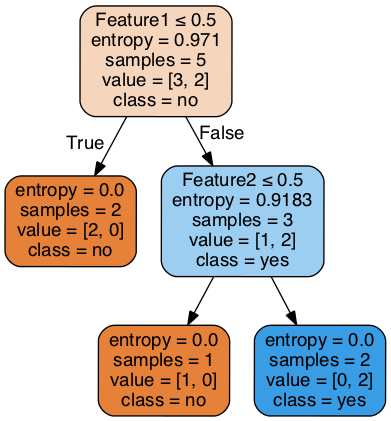

In [8]:
train_sample=tra_df.iloc[0:,0:-1]
target_sample=tra_df[['result']]     
clf = clf.fit(train_sample,target_sample)

# 决策树的显示
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=train_sample.columns,  
                         class_names=['no','yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [22]:
train_sample.columns

Index(['Feature1', 'Feature2'], dtype='object')

In [23]:
temp_list=list(tra_df['result'])

In [24]:
list(tra_df['result'])

['yes', 'yes', 'no', 'no', 'no']

In [25]:
def cacl_entropy(temp_list):
    nums_sample=len(temp_list) # equal 5
    nums_class=list(set(temp_list)) # 'yes' ,'no'
    entropy_value=0.0
    for ilabel in nums_class:
        proba_label=np.sum([1 for i in temp_list if i==ilabel])/nums_sample
        temp_entropy=-proba_label*log(proba_label,2)
        entropy_value=entropy_value+temp_entropy
    return entropy_value

In [29]:
def get_feature_entropy(flist,temp_list):
    feature_entropy=0.0
    for ifeature in list(set(flist)):
        featuer_list = [temp_list[i] for i in range(len(temp_list)) if flist[i]==ifeature ]
        feature_prob = len(featuer_list)/len(temp_list)
        feature_entropy=feature_entropy+feature_prob*cacl_entropy(featuer_list)
    return feature_entropy

In [30]:
# Feature 1 
temp_list=list(tra_df['result'])
first=list(tra_df['Feature1'])
all_entropy=cacl_entropy(temp_list)
flist_entropy=get_feature_entropy(first,temp_list)
print(all_entropy-flist_entropy)

# Feature 2
second=list(tra_df['Feature2'])
second_entropy=get_feature_entropy(second,temp_list)
print(all_entropy-second_entropy)


0.419973094022
0.170950594455


In [28]:
all_entropy

0.97095059445466858

# 划分1
[1, 1, 'yes']
[1, 1, 'yes']
[1, 0, 'no']

# 划分2
[0, 1, 'no']
[0, 1, 'no']

[1, 1, 'yes']    [1,'yes']
[1, 1, 'yes'] -> [1,'yes']
[1, 0, 'no']     [0,'no']

In [31]:
temp_list=['yes','yes','no']
cut_feature=[1,1,0]

In [32]:
all_entropy=cacl_entropy(temp_list)
second_entropy=get_feature_entropy(cut_feature,temp_list)
print(all_entropy-second_entropy)


0.918295834054


In [33]:
second_entropy

0.0

In [35]:
temp_list=list(tra_df['result'])


In [41]:
temp_list=temp_list[0:2]

In [42]:
temp_list

['yes', 'yes']

In [37]:
first=list(tra_df['Feature1'])
first

[1, 1, 1, 0, 0]

In [43]:
ifeature=1
[temp_list[i] for i in range(len(temp_list)) if first[i]==ifeature ]

['yes', 'yes']

In [44]:
temp=[]
for i in range(len(temp_list)):
    if first[i]==ifeature:
        temp.append(temp_list[i])

In [45]:
temp

['yes', 'yes']

In [48]:
temp_list[2]

IndexError: list index out of range